In [1]:
import numpy as np 
import matplotlib.pyplot as plt

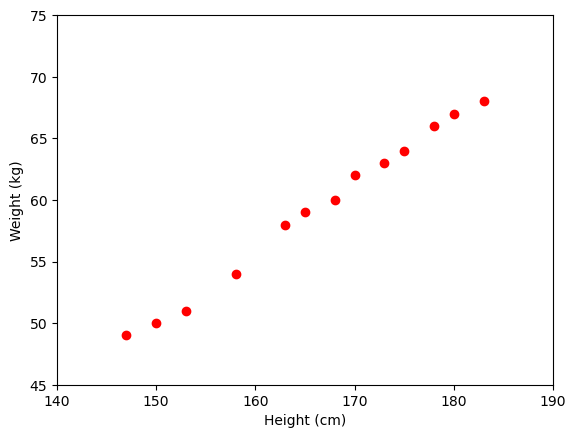

In [2]:
# height (cm)
X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T
# weight (kg)
y = np.array([[ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68]]).T
# Visualize data 
plt.plot(X, y, 'ro')
plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

w =  [[-33.73541021]
 [  0.55920496]]


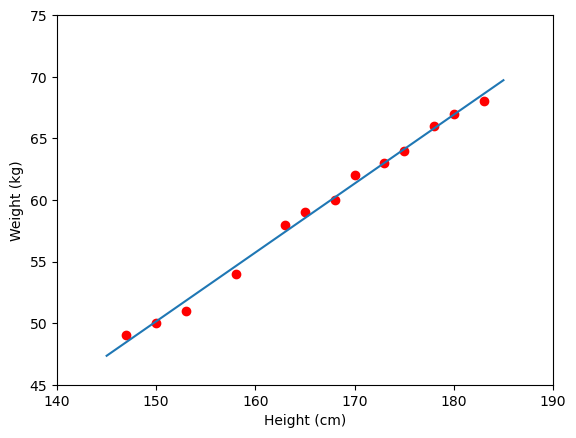

Predict weight of person with height 165 cm: 58.53 (kg), real number: 59 (kg)


In [5]:
# a
# Building Xbar 
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)

# Calculating weights of the fitting line 
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
print('w = ', w)
# Preparing the fitting line 
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(145, 185, 2)
y0 = w_0 + w_1*x0

# Drawing the fitting line 
plt.plot(X.T, y.T, 'ro')     # data 
plt.plot(x0, y0)               # the fitting line
plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

# predict weight of person with height 165 cm
y1 = w_1*165 + w_0
print( u'Predict weight of person with height 165 cm: %.2f (kg), real number: 59 (kg)'  %(y1))

Gradient Descent converged in 171 iterations.
Accelerated Gradient Descent converged in 197 iterations.
Stochastic Gradient Descent did not converge after 13000 updates.


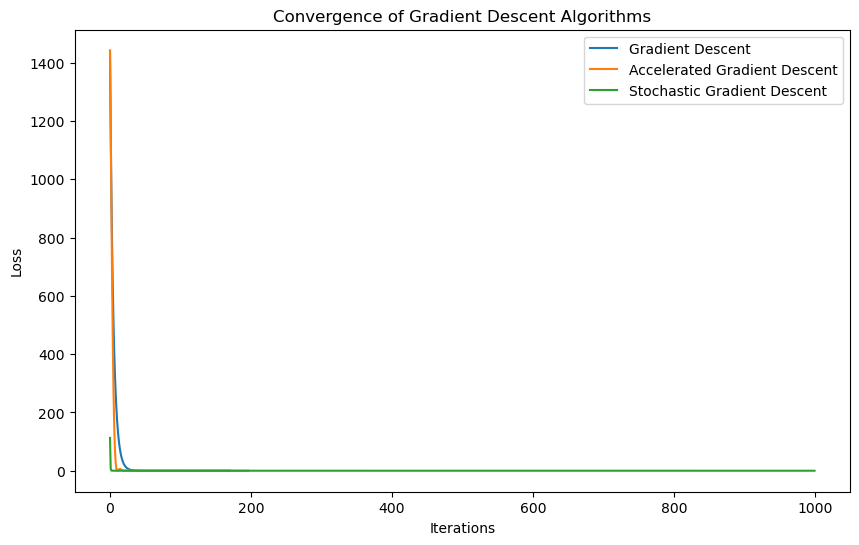

Predicted weight for 165cm using GD: 58.53kg
Predicted weight for 165cm using AGD: 58.53kg
Predicted weight for 165cm using SGD: 58.53kg


In [2]:
#b

# Data: height (cm) and weight (kg)
X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T
y = np.array([[49, 50, 51, 54, 58, 59, 60, 62, 63, 64, 66, 67, 68]]).T

# Normalize the features for better convergence
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Add a bias term (column of ones) to the feature matrix
X_normalized = np.hstack([np.ones((X_normalized.shape[0], 1)), X_normalized])

# Define the learning rate and number of iterations
learning_rate = 0.1
num_iterations = 1000
epsilon = 1e-6

# Gradient Descent
def gradient_descent(X, y, learning_rate, num_iterations, epsilon):
    m, n = X.shape
    theta = np.zeros((n, 1))
    loss_history = []
    for i in range(num_iterations):
        gradient = (1/m) * X.T @ (X @ theta - y)
        theta -= learning_rate * gradient
        loss = (1/(2*m)) * np.sum((X @ theta - y) ** 2)
        loss_history.append(loss)
        if np.linalg.norm(gradient) < epsilon:
            print(f'Gradient Descent converged in {i+1} iterations.')
            break
    else:
        print(f'Gradient Descent did not converge after {num_iterations} iterations.')
    return theta, loss_history

# Accelerated Gradient Descent
def accelerated_gradient_descent(X, y, learning_rate, num_iterations, epsilon):
    m, n = X.shape
    theta = np.zeros((n, 1))
    theta_prev = np.zeros((n, 1))
    loss_history = []
    for i in range(1, num_iterations + 1):
        y_t = theta + (i - 2) / (i + 1) * (theta - theta_prev)
        gradient = (1/m) * X.T @ (X @ y_t - y)
        theta_new = y_t - learning_rate * gradient
        loss = (1/(2*m)) * np.sum((X @ theta_new - y) ** 2)
        loss_history.append(loss)
        if np.linalg.norm(gradient) < epsilon:
            print(f'Accelerated Gradient Descent converged in {i} iterations.')
            break
        theta_prev = theta
        theta = theta_new
    else:
        print(f'Accelerated Gradient Descent did not converge after {num_iterations} iterations.')
    return theta, loss_history

# Stochastic Gradient Descent
def stochastic_gradient_descent(X, y, learning_rate, num_epochs, epsilon):
    m, n = X.shape
    theta = np.zeros((n, 1))
    loss_history = []
    total_updates = 0
    for epoch in range(num_epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradient = xi.T @ (xi @ theta - yi)
            theta -= learning_rate * gradient
            total_updates += 1
        loss = (1/(2*m)) * np.sum((X @ theta - y) ** 2)
        loss_history.append(loss)
        if np.linalg.norm(gradient) < epsilon:
            print(f'Stochastic Gradient Descent converged in {total_updates} updates.')
            return theta, loss_history
    else:
        print(f'Stochastic Gradient Descent did not converge after {total_updates} updates.')
    return theta, loss_history


theta_gd, loss_history_gd = gradient_descent(X_normalized, y, learning_rate, num_iterations, epsilon)
theta_agd, loss_history_agd = accelerated_gradient_descent(X_normalized, y, learning_rate, num_iterations, epsilon)
theta_sgd, loss_history_sgd = stochastic_gradient_descent(X_normalized, y, learning_rate, num_iterations, epsilon)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(loss_history_gd, label='Gradient Descent')
plt.plot(loss_history_agd, label='Accelerated Gradient Descent')
plt.plot(loss_history_sgd, label='Stochastic Gradient Descent')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Convergence of Gradient Descent Algorithms')
plt.legend()
plt.show()

# Predict the weight for a person with height 165 cm
height_165_normalized = scaler.transform([[165]])
height_165_normalized = np.concatenate([np.ones((1, 1)), height_165_normalized], axis=1)

weight_gd = height_165_normalized @ theta_gd
weight_agd = height_165_normalized @ theta_agd
weight_sgd = height_165_normalized @ theta_sgd

print(f'Predicted weight for 165cm using GD: {weight_gd[0, 0]:.2f}kg')
print(f'Predicted weight for 165cm using AGD: {weight_agd[0, 0]:.2f}kg')
print(f'Predicted weight for 165cm using SGD: {weight_sgd[0, 0]:.2f}kg')


In [13]:
from sklearn import datasets, linear_model

# fit the model by Linear Regression
regr = linear_model.LinearRegression(fit_intercept=False) # fit_intercept = False for calculating the bias
regr.fit(Xbar, y)

# Compare two results
print( 'Solution found by scikit-learn  : ', regr.coef_ )
print( 'Predicted weight using scikit-learn:', regr.predict([[1, 165]]) )

Solution found by scikit-learn  :  [[-33.73541021   0.55920496]]
Predicted weight using scikit-learn: [[58.53340851]]
